In [104]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles
from itertools import chain
pd.set_option('display.max_rows', 1000)

In [3]:
os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

In [24]:
outdir = 'results/notebooks/gene_list_comparison.2022May/'
os.makedirs(outdir, exist_ok=True)

## Load the gene data

In [93]:
gene_ref = 'results/refs/gencode/v30/gencode.v30.annotation.grch37.bed'
cols = ['chrom', 'start', 'end', 'strand', 'type', 'geneid', 'genename', 'detailed-type']
gencode = pd.read_table(gene_ref, header=None, names=cols)

# extract just the genes
genes_df = gencode.copy() #loc[gencode.type.isin(['gene'])]
genes_df = genes_df.loc[~genes_df.duplicated(subset='geneid'), :]
genes_df.loc[:, 'chrom'] = genes_df['chrom'].astype(str)
genes_df.set_index('geneid', inplace=True)

## First Analysis using PieQTLs WITHOUT SigGWAS Intersection

### Joining the Summary Tables

In [25]:
join_fn = os.path.join(outdir, 'Unique_Genes_And_SNPs.xlsx')
writer = pd.ExcelWriter(join_fn, engine='xlsxwriter')

In [26]:
# finemapping
finemap_summary = 'results/main/intersect_t1d_gwas_hichip/Unique_Counts_By_Cell_Line.xlsx'
finemap_summary = pd.read_excel(finemap_summary)
finemap_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# colocalization
coloc_summary = 'results/notebooks/colocalization_with_eqtl_catalogue/Unique_Counts_By_Cell_Line.xlsx'
coloc_summary = pd.read_excel(coloc_summary)
coloc_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# pieqtls
pieqtls_summary = 'results/main/gwas_pieqtls/2021_chiou_et_al/2021_chandra_et_al/Unique_Counts_By_Cell_Line.xlsx'
pieqtls_summary = pd.read_excel(pieqtls_summary)
pieqtls_summary.columns = ['Cell Line', 'SNPs', 'Genes']

In [8]:
finemap_summary.to_excel(writer, index=False, sheet_name='finemapping')
coloc_summary.to_excel(writer, index=False, sheet_name='colocalization')
pieqtls_summary.to_excel(writer, index=False, sheet_name='pieqtls')

In [9]:
writer.save()

### Making the venn diagram

In [10]:
finemap_genes = 'results/main/intersect_t1d_gwas_hichip/gene_list.txt'
finemap_genes = pd.read_table(finemap_genes, header=None).squeeze('columns').tolist()

In [81]:
coloc_genes = 'results/main/GRCh37/sgls/notebook_output/Find_SGLs.Notebook_Managed.LD_SNPs_NOT_Included/compiled_sgls_genes.txt'
coloc_genes = set(pd.read_table(coloc_genes, header=None).squeeze().tolist())

coloc_ld_genes = 'results/main/GRCh37/sgls/notebook_output/Find_SGLs.Notebook_Managed.LD_SNPs_ARE_Included/compiled_sgls_genes.txt'
coloc_ld_genes = set(pd.read_table(coloc_ld_genes, header=None).squeeze().tolist())

coloc_genes = coloc_genes.union(coloc_ld_genes)

In [83]:
pieqtls_genes = 'results/main/gwas_pieqtls/2021_chiou_et_al/2021_chandra_et_al/gene_list.txt'
pieqtls_genes = pd.read_table(pieqtls_genes, header=None).squeeze('columns').tolist()

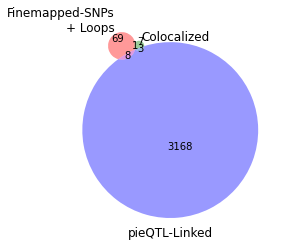

In [84]:
venn3([set(finemap_genes), set(coloc_genes), set(pieqtls_genes)], set_labels=['Finemapped-SNPs\n+ Loops',
                                                                             'Colocalized',
                                                                             'pieQTL-Linked'])

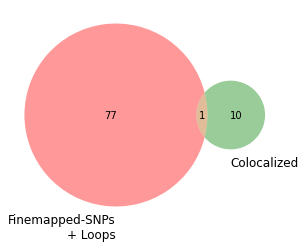

In [85]:
venn2([set(finemap_genes), set(coloc_genes)], set_labels=['Finemapped-SNPs\n+ Loops',
                                                          'Colocalized'])

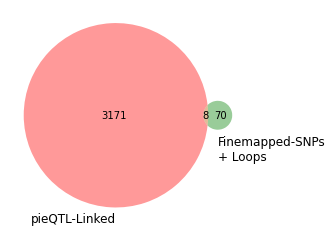

In [86]:
venn2([set(pieqtls_genes), set(finemap_genes)], set_labels=['pieQTL-Linked', 'Finemapped-SNPs\n+ Loops'])

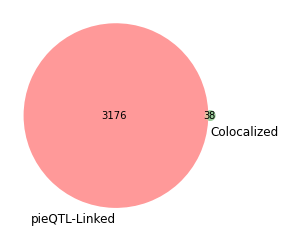

In [87]:
venn2([set(pieqtls_genes), set(coloc_genes)], set_labels=['pieQTL-Linked', 'Colocalized'])

## Second Analysis using PieQTLs WITH SigGWAS Intersection

In [64]:
join_fn = os.path.join(outdir, 'Unique_Genes_And_SNPs.redo.xlsx')
writer = pd.ExcelWriter(join_fn, engine='xlsxwriter')

In [65]:
# finemapping
finemap_summary = 'results/main/intersect_t1d_gwas_hichip/Unique_Counts_By_Cell_Line.xlsx'
finemap_summary = pd.read_excel(finemap_summary)
finemap_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# colocalization
coloc_summary = 'results/main/sgls/combined/Unique_Counts_By_Cell_Line.xlsx'
coloc_summary = pd.read_excel(coloc_summary)
coloc_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# pieqtls
pieqtls_summary = 'results/notebooks/Intersect_T1D_Significant_GWAS_with_PieQTLs/Unique_Counts_By_Cell_Line.xlsx'
pieqtls_summary = pd.read_excel(pieqtls_summary)
pieqtls_summary.columns = ['Cell Line', 'SNPs', 'Genes']

In [66]:
finemap_summary.to_excel(writer, index=False, sheet_name='finemapping')
coloc_summary.to_excel(writer, index=False, sheet_name='colocalization')
pieqtls_summary.to_excel(writer, index=False, sheet_name='pieqtls')

In [67]:
writer.save()

### Making the venn diagram

In [94]:
finemap_genes = 'results/main/intersect_t1d_gwas_hichip/gene_list.txt'
finemap_genes = pd.read_table(finemap_genes, header=None).squeeze('columns').tolist()

In [95]:
# coloc_genes = 'results/main/sgls/combined/gene_list.txt'
# coloc_genes = pd.read_table(coloc_genes, header=None).squeeze('columns').tolist()

In [96]:
pieqtls_genes = 'results/notebooks/Intersect_T1D_Significant_GWAS_with_PieQTLs/gene_list.txt'
pieqtls_genes = pd.read_table(pieqtls_genes, header=None).squeeze('columns').tolist()

In [97]:
finemap_label = 'Finemapped-SNPs\n+ Loops'
coloc_label = 'Colocalized\n+ Loops'
pieqtl_label = 'pieQTL-Linked \n+ Sig.GWAS'

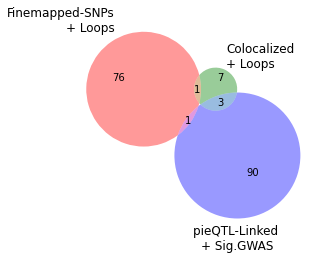

In [218]:
fig, ax = plt.subplots()
venn3([set(finemap_genes), set(coloc_genes), set(pieqtls_genes)], set_labels=[finemap_label,
                                                                             coloc_label,
                                                                             pieqtl_label])

fn = os.path.join(outdir, 'threeway_comparison.png')
fig.savefig(fn, dpi=600)

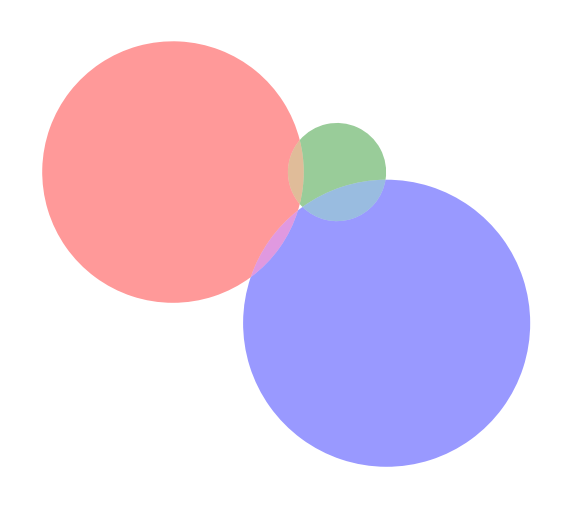

In [308]:
fig, ax = plt.subplots(figsize=(10, 10))
v = venn3([set(finemap_genes), set(coloc_genes), set(pieqtls_genes)],
              set_labels=[finemap_label, coloc_label, pieqtl_label], ax=ax)
for letter in ['A', 'B', 'C', '001', '010', '100', '011', '101', '110']:
    v_text = v.get_label_by_id(letter)
    v_text.set_text('')

fn = os.path.join(outdir, 'threeway_comparison.blank.png')
fig.savefig(fn, dpi=600)

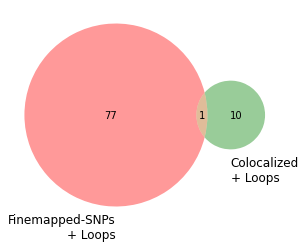

In [99]:
fig, ax = plt.subplots()
venn2([set(finemap_genes), set(coloc_genes)], set_labels=[finemap_label,
                                                          coloc_label])
fn = os.path.join(outdir, 'two_comparison.finemap.coloc.png')
fig.savefig(fn, dpi=600)

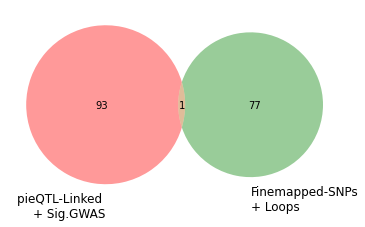

In [100]:
fig, ax = plt.subplots()

venn2([set(pieqtls_genes), set(finemap_genes)], set_labels=[pieqtl_label, finemap_label])

fn = os.path.join(outdir, 'two_comparison.finemap.pieqtl.png')
fig.savefig(fn, dpi=600)

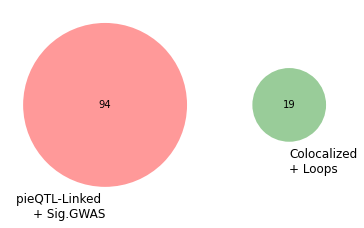

In [76]:
fig, ax = plt.subplots()

venn2([set(pieqtls_genes), set(coloc_genes)], set_labels=[pieqtl_label, coloc_label])

fn = os.path.join(outdir, 'two_comparison.coloc.pieqtl.png')
fig.savefig(fn, dpi=600)

## Evaluating Highly and Under Studied Genes

In [158]:
union_genelist = set(finemap_genes).union(coloc_genes).union(pieqtls_genes)
union_df = genes_df.iloc[genes_df.index.isin(union_genelist)]
print('Number of genes in the union: {}'.format(union_df.shape[0]))

# extracting all protein coding genes
union_prots = union_df.loc[union_df['detailed-type'] == 'protein_coding']

Number of genes in the union: 173


In [159]:
union_prots.head()

,chrom,start,end,strand,type,genename,detailed-type
geneid,,,,,,,
ENSG00000142686,chr1,36179478,36184495,-,gene,C1orf216,protein_coding
ENSG00000183431,chr1,38422647,38455747,-,gene,SF3A3,protein_coding
ENSG00000183386,chr1,38462442,38471278,-,gene,FHL3,protein_coding
ENSG00000134242,chr1,114356433,114414375,-,gene,PTPN22,protein_coding
ENSG00000090104,chr1,192544893,192549154,+,gene,RGS1,protein_coding


In [318]:
# genes from malacards
malacards = pd.read_table('results/refs/genecards/2022.MalaCards.T1D.tsv')

In [319]:
# # genes form an enrichr dataset
# import json
# def read_gene_data(json_fn):
#     with open(json_fn) as f:
#         j = json.load(f)
        
#     genelist = []
#     for item in j['associations']:
#         genelist.append(item['gene']['symbol'])
#     return(genelist)

# pancreas_fn = 'results/refs/enrichr/t1d.pancreas.GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases.json'
# pancreas_genelist = read_gene_data(pancreas_fn)
# tcell_fn = 'results/refs/enrichr/t1d.t_lymphocyte.GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases.json'
# tcell_genelist = read_gene_data(tcell_fn)
# enrichr_genelist = list(set(pancreas_genelist + tcell_genelist))
# print('Number of genes in enrichr: {}'.format(len(enrichr_genelist)))
# enrichr_genelist[0:10]

In [320]:
# genes from a Klak et al 2020
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7882399/
klak_genes = ['PTPN22', 'PHTF1', 'CAMSAP2', 'IL10', 'IFIH1', 'STAT4', 'CTLA4', 'ACOXL',
        'EFR3B', 'AFF3', 'CCR5', 'AC080079.1', 'NOL8P1', 'ADAD1', 'IL21', 'IL2',
        'LINC02357', 'IL7R', 'CENPW', 'BACH2', 'AL596442.1', 'AL049612.1', 'TNFAIP3', 'SKAP2',
        'COBL', 'IKZF1', 'GLIS3', 'NRP1', 'IL2RA', 'RNLS', 'INS', 'BAD',
        'ITGB7', 'ERBB3', 'DGKA', 'ZDHHC17', 'SH2B3', 'CD69', 'LMO7', 'GPR183', 'AL163932.1',
        'LINC01550', 'ZFP36L1', 'MAGOH3P', 'DLK1', 'CTSH', 'RASGPR1', 'IL27', 'CLEC16A',
        'DEXI', 'BCAR1', 'SMARCE1', 'ORMDL3', 'CD226', 'PTPN2', 'FUT2', 'PRKD2', 'TYK2',
        'CDC34', 'MADCAM1', 'SIRPG', 'UBASH3A', 'AC002378.1', 'C1QTNF6', 'RAC2', 'TLR7/8', 'GAB3']

In [321]:
# genes from the edGAR database 
# http://edgar.biocomp.unibo.it/cgi-bin/gene_disease_db/main_table.py
edgar_genes = ['CAPN10', 'INSR', 'SLC2A4', 'ABCC8', 'CDKAL1', 'DNAJC3', 'ENPP1', 'GCGR',
        'GCK', 'GLIS3', 'GPD2', 'HNF1A', 'HNF1A', 'IGF2BP2', 'IL2RA', 'IL6',
        'KCNJ11', 'LIPC', 'NEUROD1', 'RETN', 'SLC2A2', 'SLC30A8', 'SUMO4', 'TBC1D4',
        'TCF7L2', 'ABCC8', 'ABCC8', 'AKT2', 'HNF1A', 'HNF1B', 'HNF4A', 'INS',
        'INS', 'INSR', 'IRS1', 'KCNJ11', 'KCNJ11', 'MAPK8IP1', 'PAX4', 'ZFP57',
        'PPP1R3A', 'CAPN10', 'CCR5', 'CTLA4', 'FOXP3', 'GCK', 'HMGA1', 'IRS2',
        'ITPR3', 'MTNR1B', 'OAS1', 'PDX1', 'PLAGL1', 'PPARG', 'PTPN1', 'WFS1',
        'EIF2AK3', 'INSR', 'PAX4', 'PTPN22']

In [367]:
# open target genes 
# https://platform.opentargets.org/disease/MONDO_0005147/associations
open_targets = pd.read_table('results/refs/open_targets/open-targets-genelist - MONDO_0005147-associated-diseases.tsv')
open_targets = open_targets.loc[open_targets.overallAssociationScore >= 0.5]

In [368]:
#gwas catalog genes
# https://www.ebi.ac.uk/gwas/efotraits/MONDO_0005147
gwas_t1d = pd.read_csv('results/refs/gwas_catalog/gwas-gene-list - efotraits_MONDO_0005147-associations-2022-05-18.csv')

In [369]:
gwas_t1d_genes = list(set(chain(*gwas_t1d['Mapped gene'].str.split(', ').tolist())))

In [370]:
studied_t1d_genes = set(malacards.Symbol.tolist() + \
                        klak_genes + edgar_genes + open_targets.symbol.tolist() + gwas_t1d_genes)

In [401]:
len(studied_t1d_genes)

497

In [379]:
list(studied_t1d_genes)[0:10]

['PTGES',
 'IL1B',
 'CAMK4',
 'HLA-W',
 'RN7SL366P',
 'PDE4A',
 'TNFRSF11B',
 'CARD9',
 'MICA',
 'MADCAM1']

In [380]:
len(studied_t1d_genes)

497

In [381]:
union_prots.shape

(109, 7)

In [396]:
highly_studied = union_prots.loc[union_prots.genename.isin(studied_t1d_genes)]
num_highly_studied = highly_studied.shape
print(num_highly_studied)
highly_studied

(26, 7)


,chrom,start,end,strand,type,genename,detailed-type
geneid,,,,,,,
ENSG00000134242,chr1,114356433,114414375,-,gene,PTPN22,protein_coding
ENSG00000090104,chr1,192544893,192549154,+,gene,RGS1,protein_coding
ENSG00000163599,chr2,204732494,204738688,+,gene,CTLA4,protein_coding
ENSG00000204644,chr6,29640169,29648887,-,gene,ZFP57,protein_coding
ENSG00000204520,chr6,31367561,31383092,+,gene,MICA,protein_coding
ENSG00000204475,chr6,31556672,31560783,-,gene,NCR3,protein_coding
ENSG00000204296,chr6,32256303,32339689,-,gene,TSBP1,protein_coding
ENSG00000204290,chr6,32361740,32374905,-,gene,BTNL2,protein_coding
ENSG00000204267,chr6,32789610,32806547,-,gene,TAP2,protein_coding


In [397]:
understudied = union_prots.loc[~union_prots.genename.isin(studied_t1d_genes)]
num_understudied = understudied.shape
print(num_understudied)
understudied

(83, 7)


,chrom,start,end,strand,type,genename,detailed-type
geneid,,,,,,,
ENSG00000142686,chr1,36179478,36184495,-,gene,C1orf216,protein_coding
ENSG00000183431,chr1,38422647,38455747,-,gene,SF3A3,protein_coding
ENSG00000183386,chr1,38462442,38471278,-,gene,FHL3,protein_coding
ENSG00000119772,chr2,25450724,25565459,-,gene,DNMT3A,protein_coding
ENSG00000173557,chr2,26785453,26802400,+,gene,C2orf70,protein_coding
ENSG00000170485,chr2,101436601,101613291,+,gene,NPAS2,protein_coding
ENSG00000178562,chr2,204571198,204603635,+,gene,CD28,protein_coding
ENSG00000115694,chr2,242432085,242449145,-,gene,STK25,protein_coding
ENSG00000197375,chr5,131705444,131731306,+,gene,SLC22A5,protein_coding


In [398]:
for gene in highly_studied.genename.tolist():
    print(gene)

PTPN22
RGS1
CTLA4
ZFP57
MICA
NCR3
TSBP1
BTNL2
TAP2
BACH2
IL2RA
RBM17
M6PR
SUOX
RPS26
CUX2
ATXN2
NAA25
CTSH
RMI2
ZPBP2
GSDMB
ORMDL3
PRKD2
IL2RB
RAC2


In [400]:
for gene in understudied.genename.tolist():
    print(gene)

C1orf216
SF3A3
FHL3
DNMT3A
C2orf70
NPAS2
CD28
STK25
SLC22A5
HIST1H1A
BTN3A2
BTN2A2
BTN3A1
BTN2A1
HMGN4
ZNF165
ZSCAN9
ZKSCAN4
ZSCAN26
ZSCAN23
TRIM27
RNF39
TRIM26
GNL1
MRPS18B
C6orf136
DHX16
PPP1R18
TUBB
FLOT1
VARS2
CCHCR1
TCF19
MICB
LST1
AIF1
PRRC2A
BAG6
C6orf47
CSNK2B
LY6G5B
LY6G5C
MSH5
C6orf48
SKIV2L
PPT2
WDR46
PFDN6
ETS1
USP30
ARPC3
VPS29
RAD9B
MAPKAPK5
TMEM116
TRAFD1
HECTD4
RPH3A
ZGLP1
VASP
NOVA2
AC008755.1
SAE1
BBC3
CCDC9
C5AR2
DHX34
BICRA
SELENOW
PLA2G4C
CARD8
HSD17B14
IZUMO2
TMPRSS3
ELFN2
MFNG
CARD10
CDC42EP1
SH3BP1
Z83844.3
PDXP
NOL12
Z83844.1


In [309]:
understudied.genename.tolist()

['C1orf216',
 'FHL3',
 'DNMT3A',
 'C2orf70',
 'NPAS2',
 'CD28',
 'STK25',
 'HIST1H1A',
 'HMGN4',
 'ZNF165',
 'ZSCAN9',
 'ZSCAN26',
 'ZSCAN23',
 'RNF39',
 'GNL1',
 'C6orf136',
 'DHX16',
 'PPP1R18',
 'TUBB',
 'CCHCR1',
 'TCF19',
 'MICB',
 'LST1',
 'AIF1',
 'PRRC2A',
 'C6orf47',
 'CSNK2B',
 'LY6G5B',
 'LY6G5C',
 'MSH5',
 'C6orf48',
 'SKIV2L',
 'PPT2',
 'PFDN6',
 'ETS1',
 'USP30',
 'ARPC3',
 'VPS29',
 'RAD9B',
 'MAPKAPK5',
 'TMEM116',
 'TRAFD1',
 'HECTD4',
 'RPH3A',
 'ZGLP1',
 'NOVA2',
 'AC008755.1',
 'SAE1',
 'BBC3',
 'CCDC9',
 'C5AR2',
 'DHX34',
 'BICRA',
 'SELENOW',
 'PLA2G4C',
 'CARD8',
 'HSD17B14',
 'IZUMO2',
 'TMPRSS3',
 'ELFN2',
 'CARD10',
 'CDC42EP1',
 'SH3BP1',
 'Z83844.3',
 'PDXP',
 'NOL12',
 'Z83844.1']

## Investigating each individual list

In [ ]:
curr = ''

In [256]:
genes_df.loc[(genes_df.index.isin(pieqtls_genes)) & (genes_df.index.isin(understudied.index))]

,chrom,start,end,strand,type,genename,detailed-type
geneid,,,,,,,
ENSG00000142686,chr1,36179478,36184495,-,gene,C1orf216,protein_coding
ENSG00000183386,chr1,38462442,38471278,-,gene,FHL3,protein_coding
ENSG00000178562,chr2,204571198,204603635,+,gene,CD28,protein_coding
ENSG00000182952,chr6,26538594,26547161,+,gene,HMGN4,protein_coding
ENSG00000197279,chr6,28048346,28057341,+,gene,ZNF165,protein_coding
ENSG00000137185,chr6,28192664,28201260,+,gene,ZSCAN9,protein_coding
ENSG00000197062,chr6,28234788,28246001,+,gene,ZSCAN26,protein_coding
ENSG00000187987,chr6,28399707,28411279,-,gene,ZSCAN23,protein_coding
ENSG00000204618,chr6,30038043,30043664,-,gene,RNF39,protein_coding


In [403]:
a, b, c = set(finemap_genes), set(coloc_genes), set(pieqtls_genes)

In [411]:
for v in genes_df.loc[[x for x in a if x in genes_df.index]].genename.tolist():
    print(v)

C5AR2
MIR3657
PDXP
AC002375.1
AC092168.1
TRAFD1
DHX34
MAPKAPK5-AS1
ATP1B3P1
BBC3
ETS1-AS1
IL2RB
MIR3145
CCDC9
ARPC3
LINC01881
SENCR
LINC01880
CARD10
AC011742.3
Z83844.1
RN7SL361P
AC010331.1
Z83844.3
SH3BP1
ATP5PBP6
RPS2P41
RAD9B
C2orf70
AC008755.1
BICRA
IZUMO2
AC010519.1
NPAS2
NOVA2
NAA25
SAE1
RPH3A
AP000904.1
VASP
STK25
DNMT3A
CARD8-AS1
VPS29
MAPKAPK5
RAC2
RNU6-900P
MFNG
USP30
RN7SL385P
ETS1
AC144548.1
HMGA1P3
AC002350.1
ELFN2
MIR3191
BTF3L4P3
HSD17B14
CUX2
CDC42EP1
LINC01868
AC011466.3
Z83844.2
BICRA-AS1
RPL31P49
CARD8
SNORD50
NANOGNBP1
PLA2G4C
FP325335.1
LINC01238
AC092168.2
SELENOW
LINC01381
NOL12


In [412]:
for v in genes_df.loc[[x for x in c if x in genes_df.index]].genename.tolist():
    print(v)

NPM1P33
AL662844.4
MSH5
ZNF165
TMEM116
ZGLP1
RMI2
ZSCAN26
TAP2
CSNK2B
KRT18P39
ZPBP2
ZKSCAN4
PPP1R18
AP003774.4
SF3A3
AIF1
C1orf216
C6orf47
SKIV2L
TRIM26
TCF19
LINC02390
HCG18
VARS2
BAG6
AP005482.1
AL645939.1
WDR46
CCHCR1
BTN3A1
HECTD4
AC009121.1
LY6G5C
HCG24
AL662844.3
BTN2A3P
C6orf136
BTN3A2
LY6G5B
BTN2A1
Y_RNA
Y_RNA
DHX16
AL671277.2
TUBB
IFITM4P
ZNF192P1
MAPKAPK5
MICA
HMGN4
PPT2
ZDHHC20P1
ZFP57
RGS1
ORMDL3
TRIM27
KANSL1-AS1
FLOT1
CD28
HCG27
PTPN22
FHL3
GSDMB
BTNL2
BACH2
M6PR
SLC22A5
NCR3
MRPS18B
DND1P1
LST1
ZSCAN9
PRRC2A
PFDN6
RPL32P1
CTSH
PRKD2
ZNRD1ASP
C6orf48
TSBP1
RNF39
ZSCAN23
AL645929.1
BTN2A2
SUOX
GNL1
MICB
TMPRSS3
AL645933.2
HCG4B
ATXN2
